In [ ]:
#imports

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests 

**Data Collection**

In [ ]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []
target_length = 3500

if len(stars) < target_length:
    additional_values = stars[:target_length - len(stars)]
    stars.extend(additional_values)

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [ ]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html5")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 30
Error on page 32
Error on page 34
Error on page 34


In [ ]:
#check the length of total reviews extracted
len(reviews)

3500

In [ ]:
len(country)

3500

In [ ]:
#check the length 
stars = stars[:3500]

In [ ]:
print(len(reviews))
print(len(stars))
print(len(date))
print(len(country))

3500
3500
3500
3500


In [ ]:
#create  a dataframe from these collected lists of data

df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [ ]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | Absolutely terrible experie...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,17th May 2023,United States
1,✅ Trip Verified | BA overbook every flight to ...,1,17th May 2023,United Kingdom
2,✅ Trip Verified | \nThe flights were all on t...,1,17th May 2023,United Kingdom
3,Not Verified | Only the second time flying BA ...,1,14th May 2023,United States
4,✅ Trip Verified | I wasn't going to bother rev...,3,14th May 2023,United Kingdom


In [ ]:
df.shape

(3500, 4)

In [ ]:
import os

cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

**Data Cleaning**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#regex
import re

In [ ]:
#create a dataframe from csv file

cwd = os.getcwd()

df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)

In [ ]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | Absolutely terrible experie...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,17th May 2023,United States
1,✅ Trip Verified | BA overbook every flight to ...,1,17th May 2023,United Kingdom
2,✅ Trip Verified | \nThe flights were all on t...,1,17th May 2023,United Kingdom
3,Not Verified | Only the second time flying BA ...,1,14th May 2023,United States
4,✅ Trip Verified | I wasn't going to bother rev...,3,14th May 2023,United Kingdom


In [ ]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [ ]:
df['verified']

0        True
1        True
2        True
3       False
4        True
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

**Cleaning- Up the Reviews**
- Extracting the column reviews into separate Data Frame for cleaning for Semantic Analysis

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip install requests beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [ ]:
# add the corpus to the original dataframe

df['corpus'] = corpus

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | Absolutely terrible experie...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,17th May 2023,United States,True,absolutely terrible experience app would let c...
1,✅ Trip Verified | BA overbook every flight to ...,1,17th May 2023,United Kingdom,True,ba overbook every flight maximise income regar...
2,✅ Trip Verified | \nThe flights were all on t...,1,17th May 2023,United Kingdom,True,flight time except belfast london never staff ...
3,Not Verified | Only the second time flying BA ...,1,14th May 2023,United States,False,verified second time flying ba first time posi...
4,✅ Trip Verified | I wasn't going to bother rev...,3,14th May 2023,United Kingdom,True,going bother reviewing flight seem perpetual d...


Clearing Date Formats

In [ ]:
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [ ]:
# convert the date to datetime format

df.date = pd.to_datetime(df.date)

In [ ]:
df.date.head()

0   2023-05-17
1   2023-05-17
2   2023-05-17
3   2023-05-14
4   2023-05-14
Name: date, dtype: datetime64[ns]

Cleaning Ratings with Stars

In [ ]:
#check for unique values
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '1', '3', '2', '5', '10', '4',
       '9', '7', '8', '6', 'None'], dtype=object)

In [ ]:
df.stars.value_counts()

1                                784
2                                395
3                                391
8                                347
10                               309
7                                300
9                                297
4                                236
5                                224
6                                178
\n\t\t\t\t\t\t\t\t\t\t\t\t\t5     35
None                               4
Name: stars, dtype: int64

In [ ]:
# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [ ]:
#check the unique values again
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '1', '3', '2', '5', '10', '4',
       '9', '7', '8', '6'], dtype=object)

Checking Null Values

In [ ]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3494
                       True     False     False        2
dtype: int64

In [ ]:
df.country.isnull().value_counts()

False    3494
True        2
Name: country, dtype: int64

We have 2 missing values for country and hhence, we are removing these reviews

In [ ]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [ ]:
df.shape

(3494, 6)

In [ ]:
#resetting the index
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | Absolutely terrible experie...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,2023-05-17,United States,True,absolutely terrible experience app would let c...
1,✅ Trip Verified | BA overbook every flight to ...,1,2023-05-17,United Kingdom,True,ba overbook every flight maximise income regar...
2,✅ Trip Verified | \nThe flights were all on t...,1,2023-05-17,United Kingdom,True,flight time except belfast london never staff ...
3,Not Verified | Only the second time flying BA ...,1,2023-05-14,United States,False,verified second time flying ba first time posi...
4,✅ Trip Verified | I wasn't going to bother rev...,3,2023-05-14,United Kingdom,True,going bother reviewing flight seem perpetual d...
...,...,...,...,...,...,...
3489,London to Barbados and back. After reading som...,10,2014-05-20,United Kingdom,False,london barbados back reading bad review deligh...
3490,London Heathrow to Madrid on a Boeing 767-300....,1,2014-05-20,United Kingdom,False,london heathrow madrid boeing outward flight p...
3491,Recently for our honeymoon we took advantage o...,4,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...
3492,Gatwick-Venice return. Two contrasting experie...,2,2014-05-18,United Kingdom,False,gatwick venice return two contrasting experien...


In [ ]:
# export the cleaned data

df.to_csv(cwd + "/cleaned-BA-reviews.csv")

**Using Data Analsyis to gain insights**

In [ ]:

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [ ]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | Absolutely terrible experie...,5,2023-05-17,United States,True,absolutely terrible experience app would let c...
1,✅ Trip Verified | BA overbook every flight to ...,1,2023-05-17,United Kingdom,True,ba overbook every flight maximise income regar...
2,✅ Trip Verified | \nThe flights were all on t...,1,2023-05-17,United Kingdom,True,flight time except belfast london never staff ...
3,Not Verified | Only the second time flying BA ...,1,2023-05-14,United States,False,verified second time flying ba first time posi...
4,✅ Trip Verified | I wasn't going to bother rev...,3,2023-05-14,United Kingdom,True,going bother reviewing flight seem perpetual d...


In [ ]:
# Calculating the average rating for British Airways
df.stars.mean()

4.77389811104751

Text(0.5, 0.98, 'Counts for each ratings')

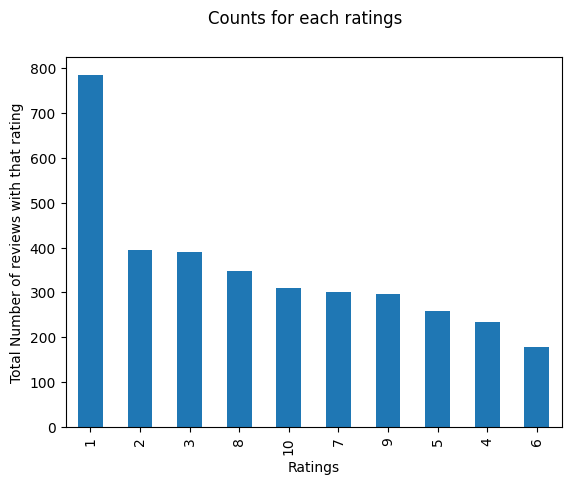

In [ ]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [ ]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [ ]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [ ]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [ ]:
#Counting the ratings
df_ratings

,Stars,total_counts,pct_values
0,1,784,22.44
1,2,395,11.31
2,3,391,11.19
3,8,347,9.93
4,10,309,8.84
5,7,300,8.59
6,9,296,8.47
7,5,259,7.41
8,4,235,6.73
9,6,178,5.09


Text(0.5, 1.0, 'Counts for each ratings')

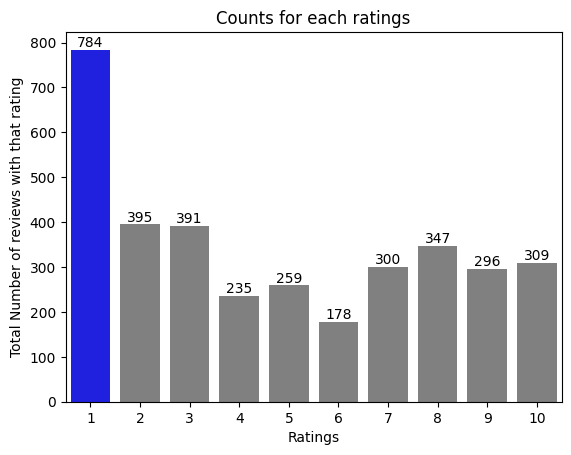

In [ ]:
clrs = ['Blue' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [ ]:
# No. of countries British Airways has got reviews from

print(f"{len(df.country.unique())} unique countries")

69 unique countries


In [ ]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [ ]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Country that submitted the maximum review')

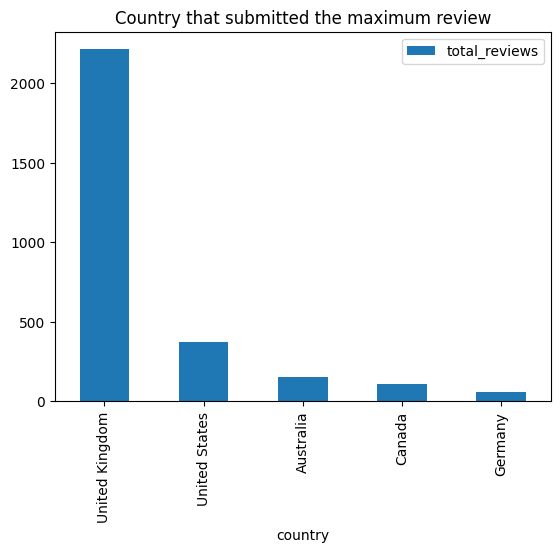

In [ ]:
df_country_review.plot(kind="bar", x='country')
plt.title("Country that submitted the maximum review")

In [ ]:
#Highest Average rating provided by countries

In [ ]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

<ipython-input-79-d2bd358aa525>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()


In [ ]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

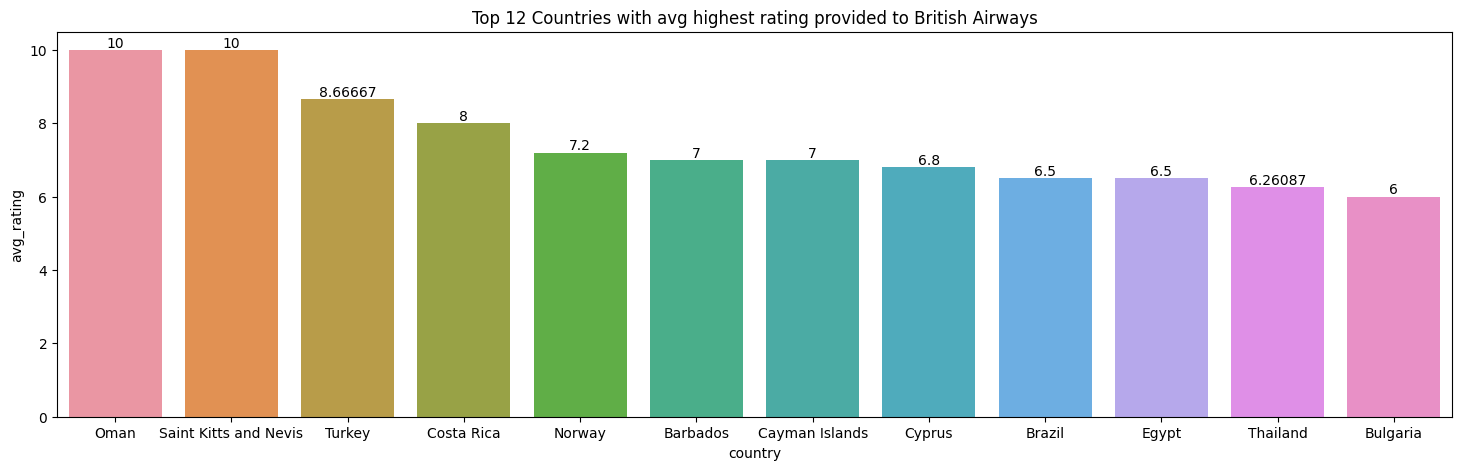

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [ ]:
#Time Series Analysis
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [ ]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
# During the period of 2020- 2022, we can the reviews are highly fluctuating and no siignificant trend can be identifed, this is due to Covid- 19 Pandemic

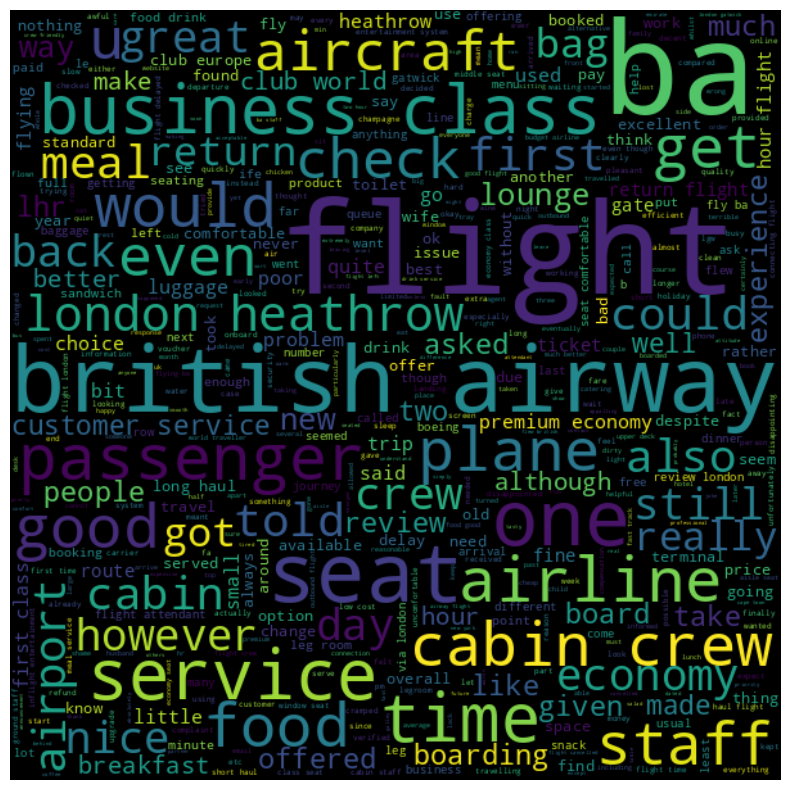

In [ ]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 499.5, 499.5, -0.5)

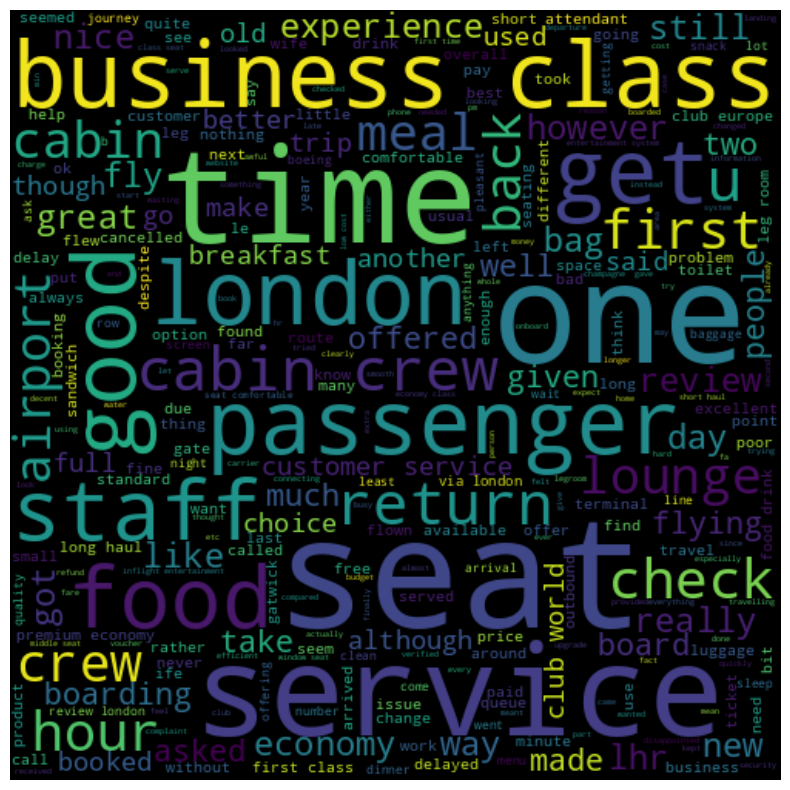

In [ ]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
# We filtered out the words generated by word cloud as many words are not signnificant to the analysis

Word Frequency

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'business'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'club'),
  Text(17, 0, 'return'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

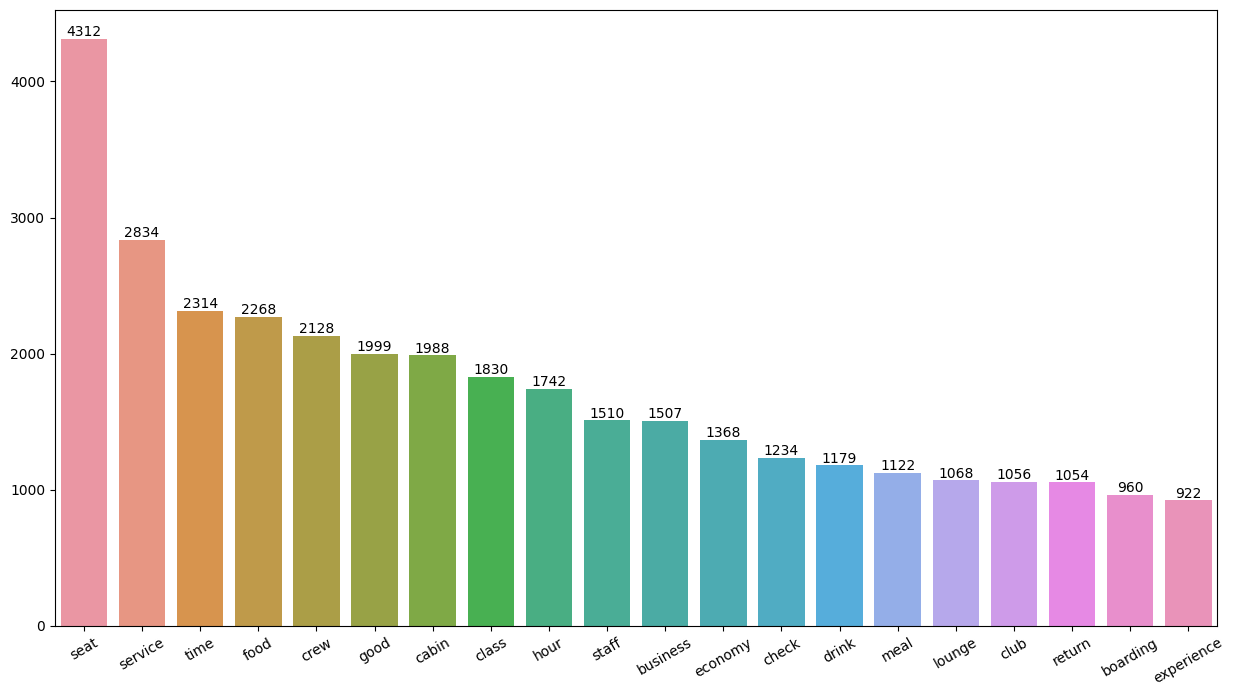

In [ ]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This helps us to identify the Keywords, This shows us what the customer reviews are mostly about.

**Word Frequency with N Gram**

<Axes: >

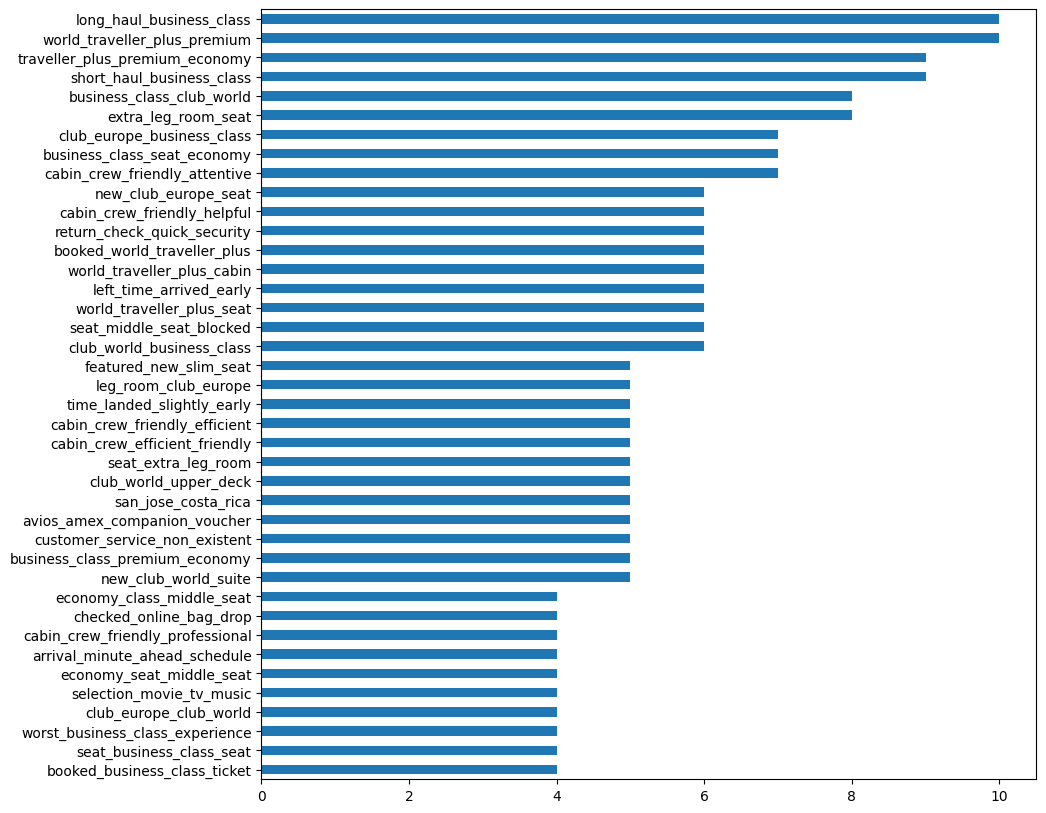

In [ ]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [ ]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

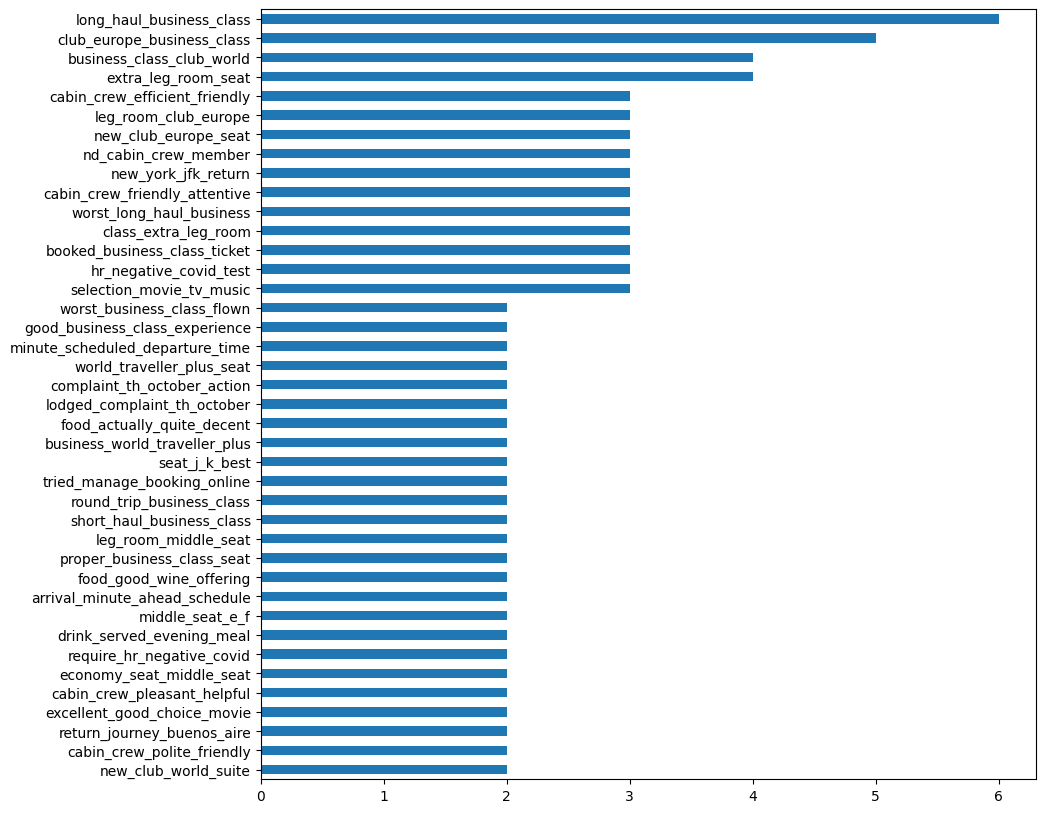

In [ ]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

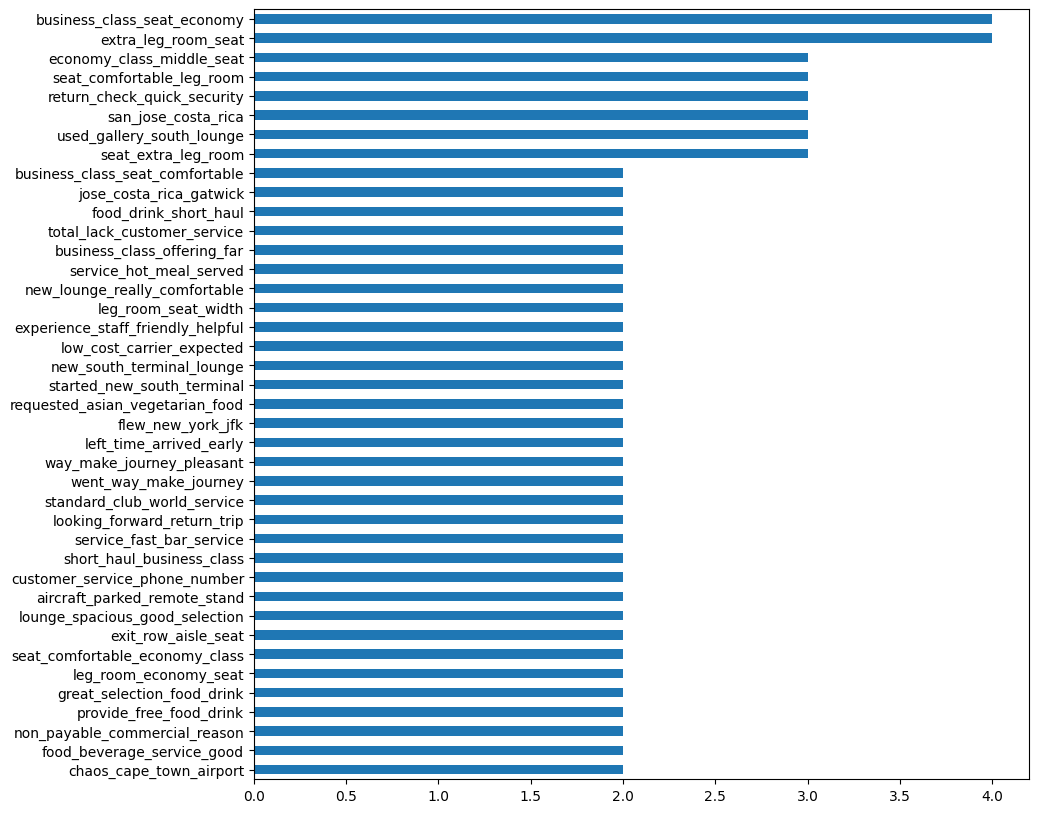

In [ ]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

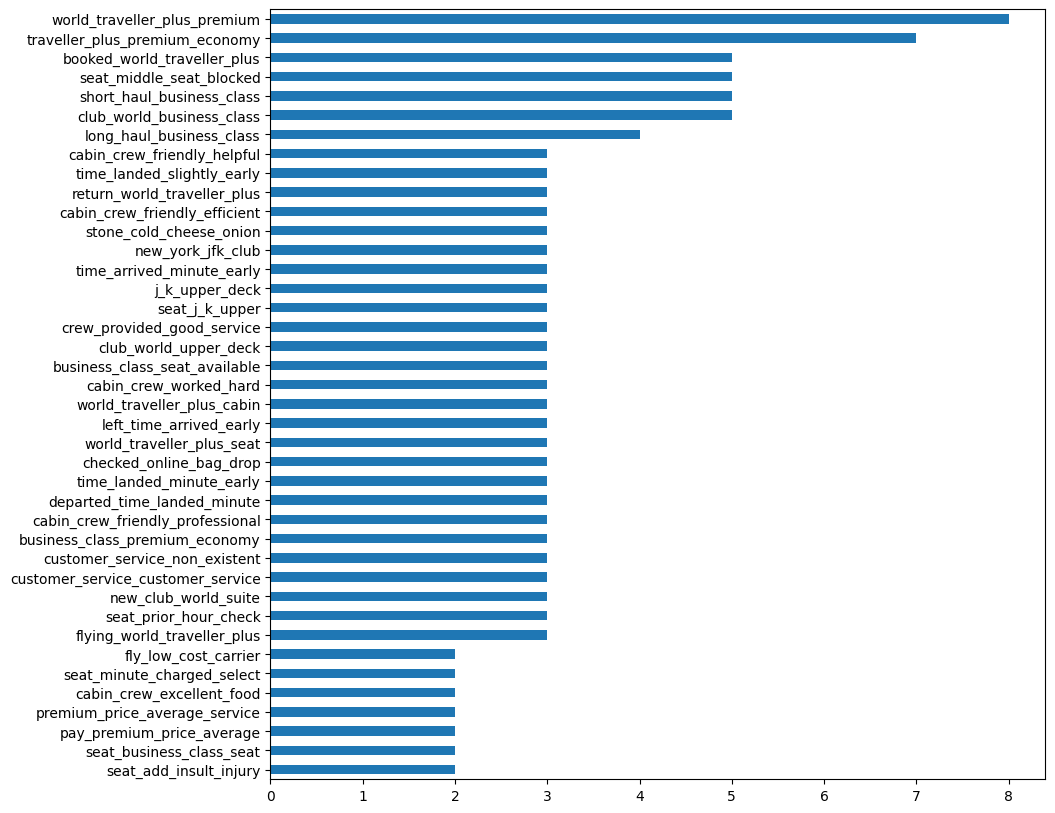

In [ ]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [ ]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [ ]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2355 number of reviews between -0.2 and 0.2 polarity score
1360 number of reviews between -0.1 and 0.1 polarity score


In [ ]:
%%capture
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df.label.value_counts()

 1    2262
-1    1111
 0     121
Name: label, dtype: int64

**Linear Discriminant Analysis (LDA)- Topic Modelling**

In [ ]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [ ]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,seat,1566.8,flight,1904.3,dhabi,22.1,seat,1588.5,flight,746.9,flight,1370.6,flight,1585.4,ba,35.5
1,ba,1422.6,good,1058.8,abu,22.1,class,1154.2,crew,399.2,hour,436.1,ba,1048.7,mask,16.2
2,flight,1041.9,time,839.3,service,19.5,food,923.8,british,366.2,ba,330.6,hour,578.5,heathrow,15.6
3,passenger,527.3,crew,738.1,lhr,14.9,ba,904.4,service,355.7,service,287.4,airway,568.2,return,13.7
4,cabin,514.7,ba,714.1,great,12.5,business,836.4,airway,349.4,food,283.6,british,556.4,service,11.9
5,economy,439.1,seat,705.8,air,12.3,service,788.8,london,325.3,meal,262.6,told,552.2,premium,11.2
6,business,438.1,lounge,656.7,well,11.8,flight,705.5,ba,266.1,airway,261.5,customer,534.5,airline,10.8
7,crew,426.2,food,625.3,flight,11.1,economy,692.1,cabin,257.1,british,260.8,london,526.5,onboard,10.4
8,class,411.5,boarding,564.4,passenger,10.9,good,641.1,heathrow,257.1,staff,246.8,day,505.6,long,10.1
9,service,411.1,cabin,556.9,negative,9.3,airway,612.1,time,228.4,time,245.5,would,482.5,fco,7.6


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**NMF(Non-negative matrix factorization)- Topic Modelling**

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.05182729, 0.06125349],
       [0.05457032, 0.03225089],
       [0.0555361 , 0.10685706],
       ...,
       [0.11343453, 0.15665361],
       [0.09065899, 0.12596271],
       [0.02010069, 0.04640128]])

In [ ]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
df_topic =pd.DataFrame(topic_dict)

In [ ]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,35.4,seat,16.8
1,ba,12.3,ba,8.7
2,hour,7.8,class,7.2
3,time,7.0,food,5.7
4,london,6.3,business,5.6
5,service,5.9,service,5.5
6,airway,5.7,cabin,5.4
7,british,5.6,good,4.9
8,would,5.1,crew,4.8
9,staff,4.4,economy,4.4


In [1]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
 
 
uploaded = files.upload()

Saving customer_booking.csv to customer_booking.csv


In [5]:
#get current working directory

cwd = os.getcwd()

#read the csv

df = pd.read_csv(cwd + "/customer_booking.csv",  encoding="ISO-8859-1")

In [6]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [7]:
df.shape

(50000, 14)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

**Sales Channel**

In [10]:
per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100

In [11]:
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


**Type of Trip**

In [12]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100

In [13]:
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


**Purchase Lead**

<Axes: xlabel='purchase_lead', ylabel='Count'>

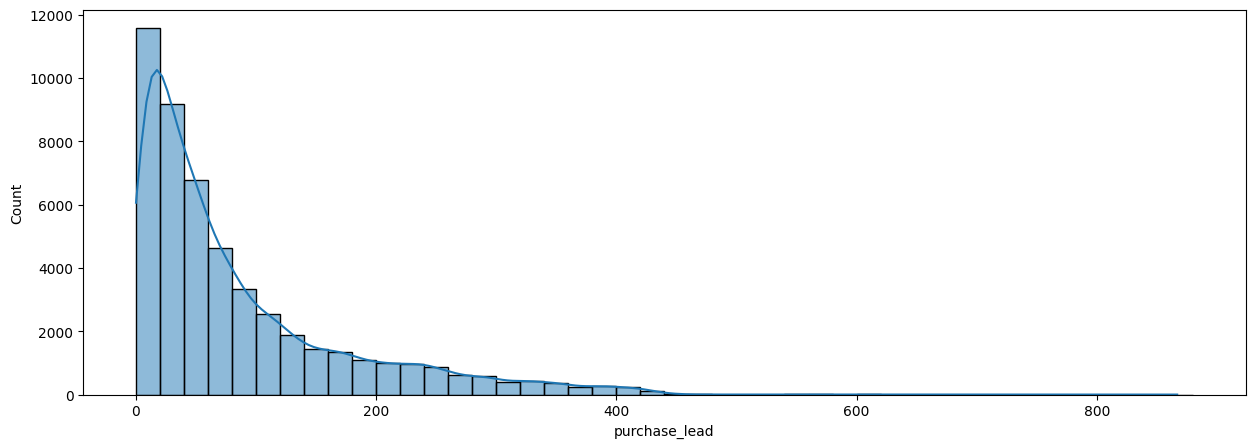

In [14]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

In [15]:
#Few reservations have been made more than two years in advance of the trip, and it appears quite odd that one would do so. 
#However, it might also be as a result of twice cancelling and rebooking within a six-month period. 
#The tickets are typically kept by the airline for rebooking within a year. However, at this point, we will classify them as outliers, 
#which will have a significant impact on the outcomes of the prediction model.

In [16]:
(df.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

In [17]:
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,Fri,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,Thu,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,Fri,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,Mon,KIXMLE,Japan,0,0,1,7.00,1


In [18]:
#filtering the data to have only purchase lead days less than 600 days
df = df[df.purchase_lead <600 ]

**Length of Stay**

<Axes: xlabel='length_of_stay', ylabel='Count'>

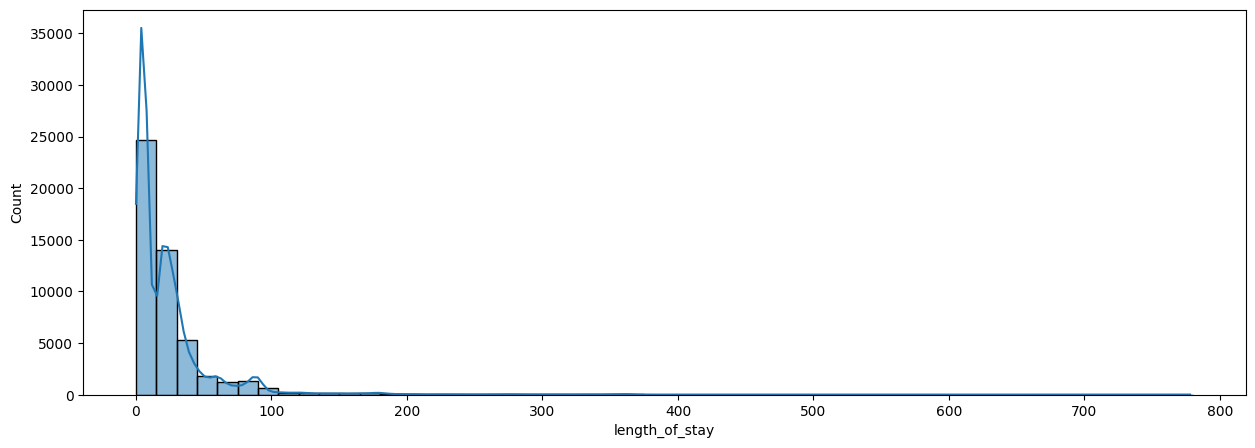

In [20]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True) 
#Seeing how many stays last over 100 days

In [21]:
(df.length_of_stay> 200).value_counts()

False    49713
True       279
Name: length_of_stay, dtype: int64

In [22]:
df[df.length_of_stay> 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

In [23]:
#filtering the data to have only length of stay days less than 500 days
df = df[df.purchase_lead <500 ]

**Flight Day**

In [24]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

In [25]:
df.flight_day.value_counts()

1    8100
3    7671
2    7670
4    7423
5    6759
7    6550
6    5809
Name: flight_day, dtype: int64

**Origin of Booking**

Text(0, 0.5, 'Number of bookings')

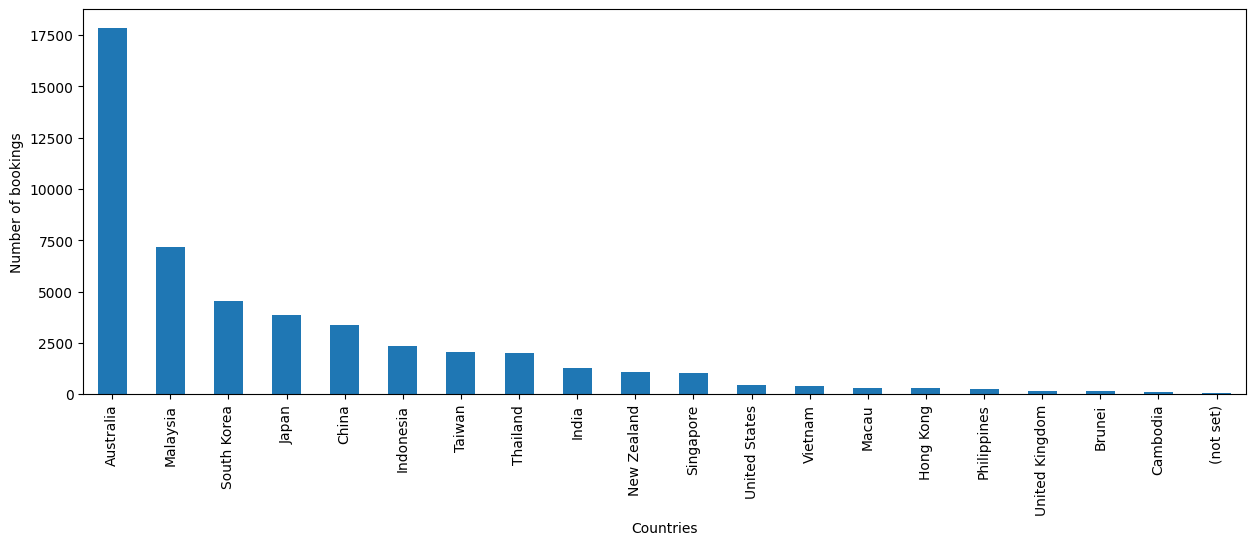

In [26]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

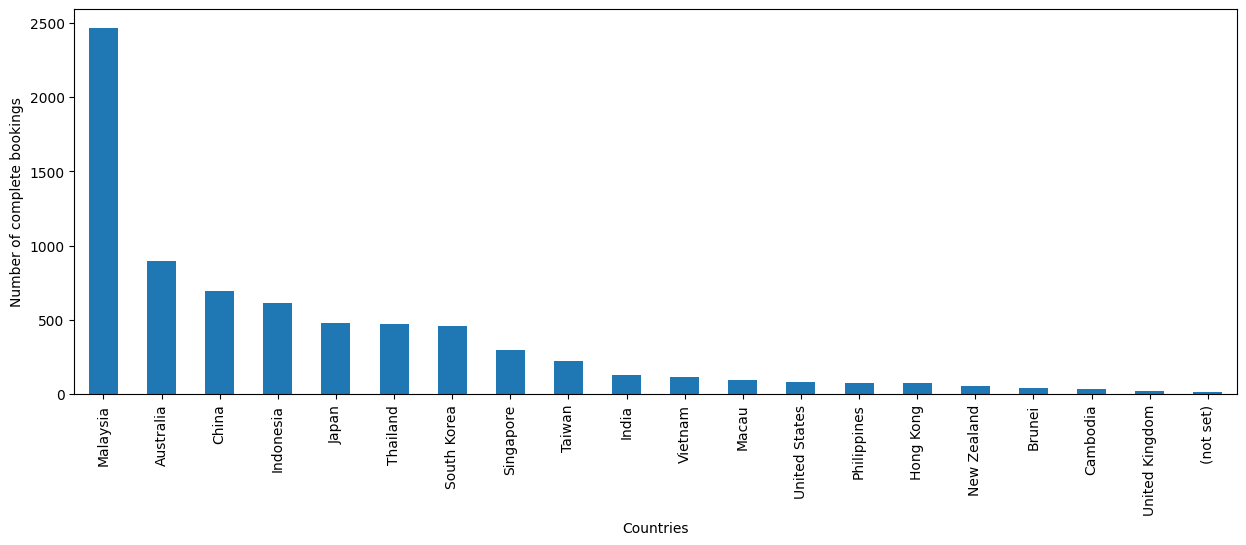

In [27]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

In [28]:
#Booking Complete

In [29]:
successful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100

In [30]:
unsuccessful_booking_per = 100-successful_booking_per

In [31]:
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


In [32]:
#Exporting Dataset to CSV

In [33]:
df.to_csv(cwd + "/filtered_customer_booking.csv")

In [34]:
 # get current working directory
cwd = os.getcwd()

df = pd.read_csv(cwd + "/filtered_customer_booking.csv", index_col=0)

In [35]:
df = df.reset_index(drop=True)

In [36]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [37]:
df_final = df

In [38]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [39]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [41]:
#store the label for supervised learning
label = df['booking_complete']

In [42]:
df_final = df_final.drop('booking_complete', axis=1)
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [43]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [44]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [46]:
# add the labels back to the dataframe
scaled_df['label']  = label
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


**Correlation Matrix**

<Axes: >

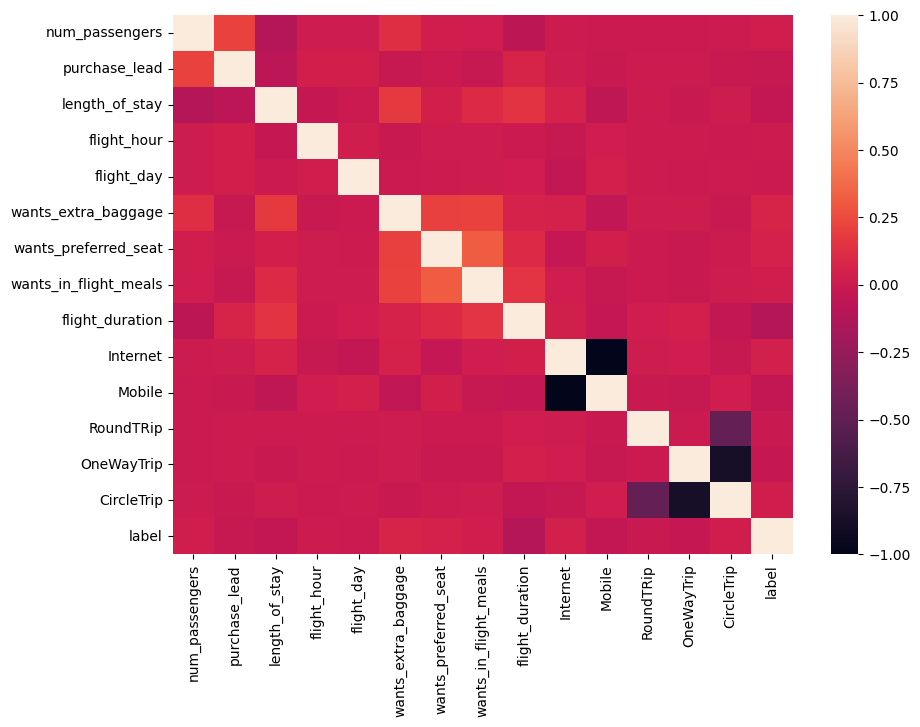

In [47]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

**Train & Test Data Split **

In [48]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [54]:
"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

**Random Forest Classifier**

In [55]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [56]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


0.9341002876078529

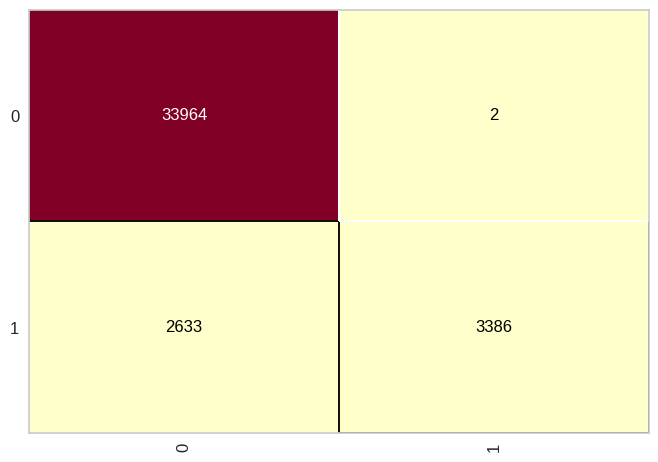

In [57]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

Checking Test Accuracy

In [58]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.86, 0.56 and 0.07 respectively


0.8554566369910973

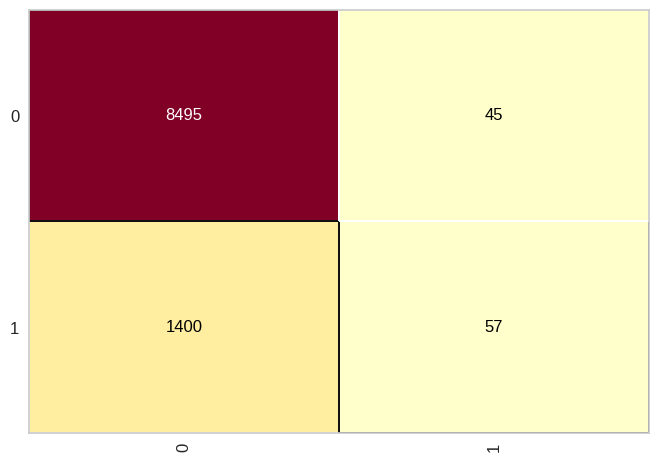

In [59]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

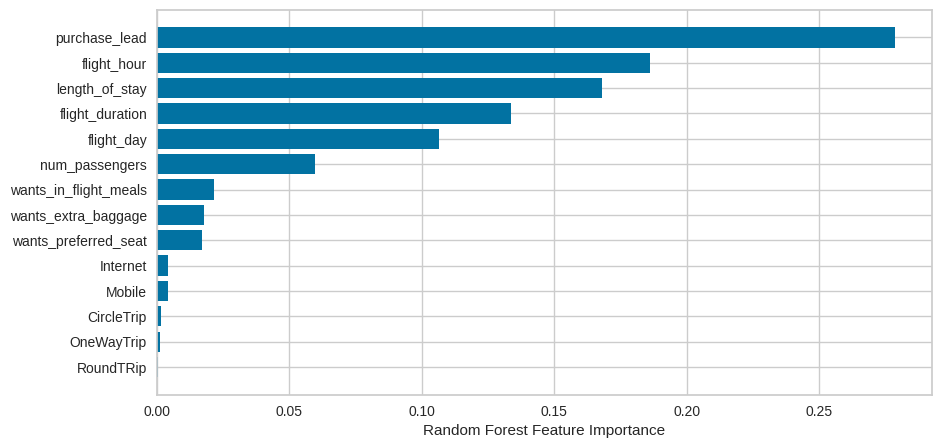

In [60]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [61]:
#One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1

**Balancing the Dataset**

In [62]:
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [63]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [64]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [65]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [66]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400769,-0.197444,-0.561979,0.726958,1.096876,-1.421288,1.538334,-0.863557,0.930420,-2.810681,2.810681,-0.048231,-0.088336,0.100826,0
1,0.400769,-0.608910,0.323178,0.357443,-1.412280,0.703587,-0.650054,-0.863557,0.195526,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
2,-0.579424,-0.931411,-0.561979,0.542200,1.096876,0.703587,1.538334,-0.863557,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
3,0.400769,0.814540,0.441199,1.465988,-0.408618,0.703587,1.538334,1.158002,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
4,0.400769,2.304714,-0.532474,-0.196830,1.598707,-1.421288,1.538334,1.158002,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,-0.579424,-0.430979,2.182008,0.726958,-1.412280,-1.421288,-0.650054,1.158002,-1.708517,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15472,-0.579424,1.003592,-0.030885,0.542200,1.598707,-1.421288,-0.650054,1.158002,-0.439155,-2.810681,2.810681,-0.048231,-0.088336,0.100826,0
15473,1.380962,0.992471,-0.502969,-0.012073,-0.408618,0.703587,-0.650054,1.158002,0.930420,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15474,-0.579424,-0.742359,-0.561979,0.911715,-0.408618,-1.421288,-0.650054,-0.863557,-1.741921,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1


In [67]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [68]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [69]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.64, 0.64, 0.6, 0.68 and 0.62 respectively


0.6398578811369509

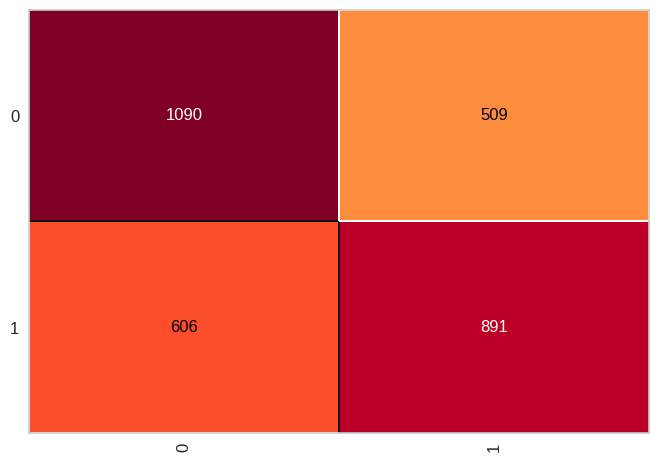

In [70]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

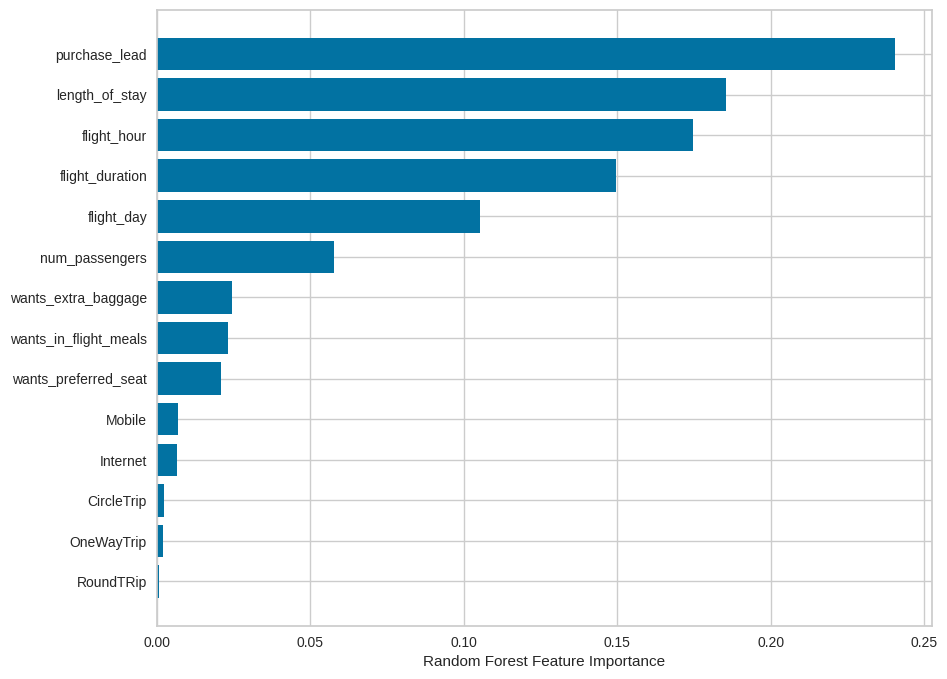

In [71]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")